Question 1 : What is Information Gain, and how is it used in Decision Trees?



Information Gain (IG) is a metric used in Decision Trees to decide which feature (attribute) to split the data on at each node. It measures how much “information” or “purity” is gained by splitting the dataset based on a specific feature.



 🔹 Concept

When building a decision tree, the goal is to reduce uncertainty (entropy) in the data with each split.
Information Gain tells us how much a feature helps in classifying the data correctly.


 🔹 Formula

[
\text{Information Gain (IG)} = \text{Entropy (Parent)} - \sum_{i=1}^{k} \frac{n_i}{n} \times \text{Entropy (Child}_i)
]

Where:

* Entropy (Parent) = measure of impurity before the split
* Entropy (Child) = impurity after the split
* ( n_i ) = number of samples in child node i
* ( n ) = total number of samples before split


 🔹 Entropy Formula

[
\text{Entropy}(S) = - \sum_{j=1}^{c} p_j \log_2(p_j)
]
where ( p_j ) is the proportion of class *j* in the dataset.


 🔹 Interpretation

* High Information Gain: The feature provides a large reduction in uncertainty — a good feature to split on.
* Low Information Gain: The feature doesn't help much in classifying — not useful for splitting.


 🔹 Example

Suppose we are predicting whether a person will Play tennis based on weather (Sunny, Overcast, Rainy).

1. Calculate the entropy of the target (Play Tennis).
2. Split the data by each feature (e.g., Weather, Temperature, Humidity).
3. Calculate the entropy after the split for each feature.
4. Compute Information Gain for each feature.
5. The feature with the highest Information Gain is chosen for the split.


 🔹 In Decision Trees

* At each node, the algorithm computes Information Gain for all features.
* The feature with maximum IG is selected as the splitting attribute.
* This process continues recursively until stopping conditions are met (e.g., max depth, no gain).


Example in Scikit-learn:
Decision Tree (using criterion='entropy') in scikit-learn uses Information Gain to build the tree.

```python
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
```


Question 2: What is the difference between Gini Impurity and Entropy?



Both Gini Impurity and Entropy are measures used in Decision Trees to check how pure or impure a node is — that means, how mixed the classes are in that node.
The goal of a decision tree is to split the data in such a way that the resulting groups (nodes) are as pure as possible — each containing mostly one class.


Gini Impurity measures how often you would misclassify an item if you randomly labeled it according to the class distribution in the node.
Its formula is:
[
Gini = 1 - \sum p_i^2
]
Here, ( p_i ) is the probability of each class.
A Gini value of 0 means the node is pure (only one class), while higher values mean more mixing.
Gini is simple and fast to calculate since it doesn't use logarithms.


Entropy, on the other hand, comes from information theory and measures the amount of disorder or uncertainty in the data.
Its formula is:
[
Entropy = -\sum p_i \log_2(p_i)
]
Like Gini, 0 means the node is pure, and higher values mean more uncertainty.
Entropy gives a more theoretical and information-based view of impurity but is slightly slower to compute because it uses logarithms

In practice, both give very similar results.

* Gini Impurity is used by the CART algorithm (the default in scikit-learn).
* Entropy is used by ID3 and C4.5 decision tree algorithms.

Gini tends to be a bit faster and sometimes slightly biased toward the majority class, while Entropy provides more balanced splits but takes a bit longer.



Question 3:What is Pre-Pruning in Decision Trees?


Pre-Pruning (also called Early Stopping) is a technique used to stop the growth of a decision tree early — before it becomes too complex or starts overfitting                                            





Question 4:Write a Python program to train a Decision Tree Classifier using Gini
Impurity as the criterion and print the feature importances (practical).


In [1]:
#4
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load dataset (Iris dataset for example)
iris = load_iris()
X = iris.data
y = iris.target

# Create a Decision Tree Classifier using Gini Impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train (fit) the model
clf.fit(X, y)

# Get feature importances
feature_importance = clf.feature_importances_

# Display feature importances with feature names
importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': feature_importance
})

print("Feature Importances:")
print(importance_df)


Feature Importances:
             Feature  Importance
0  sepal length (cm)    0.013333
1   sepal width (cm)    0.000000
2  petal length (cm)    0.564056
3   petal width (cm)    0.422611


Question 5: What is a Support Vector Machine (SVM)?


A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks — but it's most commonly used for classification.



In [2]:
#5
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
clf = SVC(kernel='linear')  # using linear kernel
clf.fit(X_train, y_train)

# Evaluate
print("Accuracy:", clf.score(X_test, y_test))


Accuracy: 1.0


Question 6: What is the Kernel Trick in SVM?


The Kernel Trick is a smart mathematical method used in Support Vector Machines (SVMs) to handle non-linear data — that is, data that cannot be separated by a straight line.



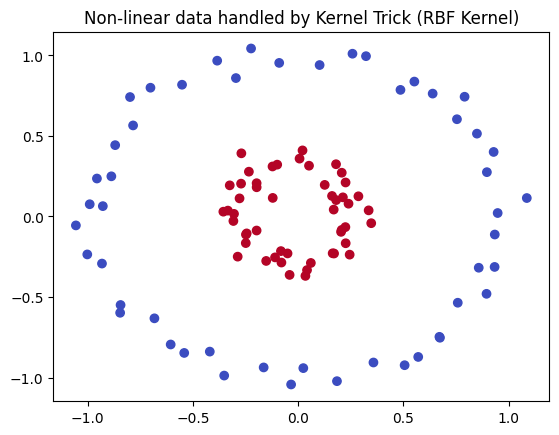

In [3]:
#6
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Create circular non-linear data
X, y = make_circles(n_samples=100, factor=0.3, noise=0.05)

# Train SVM with RBF kernel
clf = SVC(kernel='rbf')
clf.fit(X, y)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Non-linear data handled by Kernel Trick (RBF Kernel)")
plt.show()


Question 7: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.


In [4]:
# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create two SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train both models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate accuracies
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# Print the results
print("Accuracy with Linear Kernel:", acc_linear)
print("Accuracy with RBF Kernel:", acc_rbf)

# Compare which is better
if acc_linear > acc_rbf:
    print("✅ Linear Kernel performed better.")
elif acc_rbf > acc_linear:
    print("✅ RBF Kernel performed better.")
else:
    print("🤝 Both kernels performed equally well.")


Accuracy with Linear Kernel: 0.9814814814814815
Accuracy with RBF Kernel: 0.7592592592592593
✅ Linear Kernel performed better.


Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?

The Naïve Bayes classifier is a supervised machine learning algorithm based on Bayes' Theorem.
It is mainly used for classification tasks, especially in text classification (like spam detection, sentiment analysis, etc.).\


Why is it called "Naïve"?

It's called “Naïve” because it makes a simple (and unrealistic) assumption —
that all features are independent of each other.

In real life, this is rarely true (for example, in an email, the words “buy” and “offer” are related).
But surprisingly, Naïve Bayes still works very well in many situations.

In [5]:
#8
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve
Bayes, and Bernoulli Naïve Bayes




1. Gaussian Naïve Bayes

* Used when the features are continuous (numeric).
* Assumes that the data for each class follows a normal (Gaussian) distribution.
* Example: height, weight, age, or temperature values.
* Often used in datasets like Iris or medical data.

Example use case:
Predicting whether a patient has a disease based on continuous values like blood pressure or cholesterol level.



2. Multinomial Naïve Bayes

* Used when the features are counts or frequencies.
* Commonly used for text classification tasks (e.g., spam detection, sentiment analysis).
* Assumes that feature values represent the number of times something occurs (like word counts).

Example use case:
Classifying emails as *spam* or *not spam* based on how many times words like “free,” “offer,” or “buy” appear.



3. Bernoulli Naïve Bayes

* Used when the features are binary (0 or 1) — i.e., whether a feature is present or absent.
* Also used for text classification, but instead of word counts, it looks at whether a word appears at all.
* Example: 1 if a word appears in the email, 0 if it doesn’t.

Example use case:
Spam detection where we only check whether certain keywords exist or not, not how many times.




Question 10: Breast Cancer Dataset
Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer
dataset and evaluate accuracy.

In [6]:
#10
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create a Gaussian Naïve Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Accuracy of Gaussian Naïve Bayes on Breast Cancer Dataset:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of Gaussian Naïve Bayes on Breast Cancer Dataset: 0.9415204678362573

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

